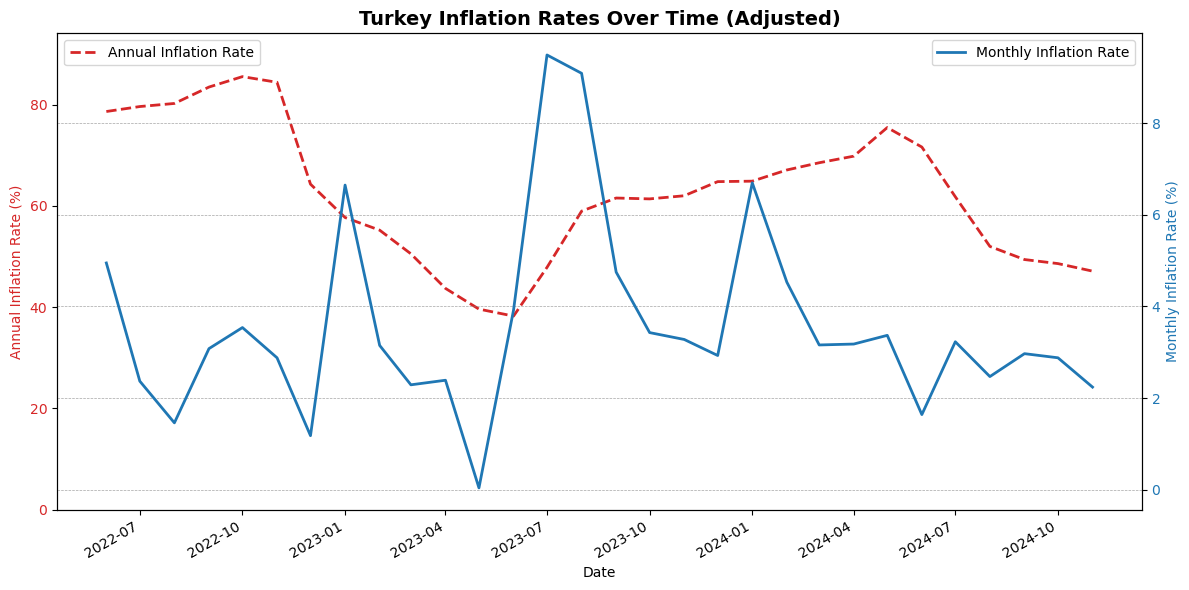

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Data input
data = """
Annual Inflation Rate,Monthly Inflation Rate,Date
47.09.,2.24,Kasım-2024
48.58.,2.88,Ekim-2024
49.38.,2.97,Eylül-2024
51.97.,2.47,Ağustos-2024
61.78.,3.23,Temmuz-2024
71.60.,1.64,Haziran-2024
75.45.,3.37,Mayıs-2024
69.80.,3.18,Nisan-2024
68.50.,3.16,Mart-2024
67.07.,4.53,Şubat-2024
64.86.,6.70,Ocak-2024
64.77.,2.93,Aralık-2023
61.98.,3.28,Kasım-2023
61.36.,3.43,Ekim-2023
61.53.,4.75,Eylül-2023
58.94.,9.09,Ağustos-2023
47.83.,9.49,Temmuz-2023
38.21.,3.92,Haziran-2023
39.59.,0.04,Mayıs-2023
43.68.,2.39,Nisan-2023
50.51.,2.29,Mart-2023
55.18.,3.15,Şubat-2023
57.68.,6.65,Ocak-2023
64.27.,1.18,Aralık-2022
84.39.,2.88,Kasım-2022
85.51.,3.54,Ekim-2022
83.45.,3.08,Eylül-2022
80.21.,1.46,Ağustos-2022
79.60.,2.37,Temmuz-2022
78.62.,4.95,Haziran-2022
"""

# Convert data to DataFrame
df = pd.read_csv(StringIO(data), delimiter=",")

# Ensure both columns are treated as strings and clean them
df['Annual Inflation Rate'] = df['Annual Inflation Rate'].astype(str).str.rstrip('.').str.replace(',', '.').astype(float)
df['Monthly Inflation Rate'] = df['Monthly Inflation Rate'].astype(str).str.rstrip('.').str.replace(',', '.').astype(float)

# Translate Turkish month names to English
month_translation = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April', 'Mayıs': 'May',
    'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August', 'Eylül': 'September', 
    'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}
df['Date'] = df['Date'].replace(month_translation, regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%B-%Y')

# Sort data by date
df = df.sort_values(by='Date')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Annual Inflation Rate
color1 = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Inflation Rate (%)', color=color1)
ax1.plot(df['Date'], df['Annual Inflation Rate'], label='Annual Inflation Rate', color=color1, linewidth=2, linestyle='--')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0, max(df['Annual Inflation Rate']) * 1.1)  # Start from 0
ax1.legend(loc='upper left')

# Plot Monthly Inflation Rate
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Monthly Inflation Rate (%)', color=color2)
ax2.plot(df['Date'], df['Monthly Inflation Rate'], label='Monthly Inflation Rate', color=color2, linewidth=2, linestyle='-')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.legend(loc='upper right')

# Enhancements
plt.title('Turkey Inflation Rates Over Time (Adjusted)', fontsize=14, fontweight='bold')
fig.autofmt_xdate()  # Rotate date labels
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


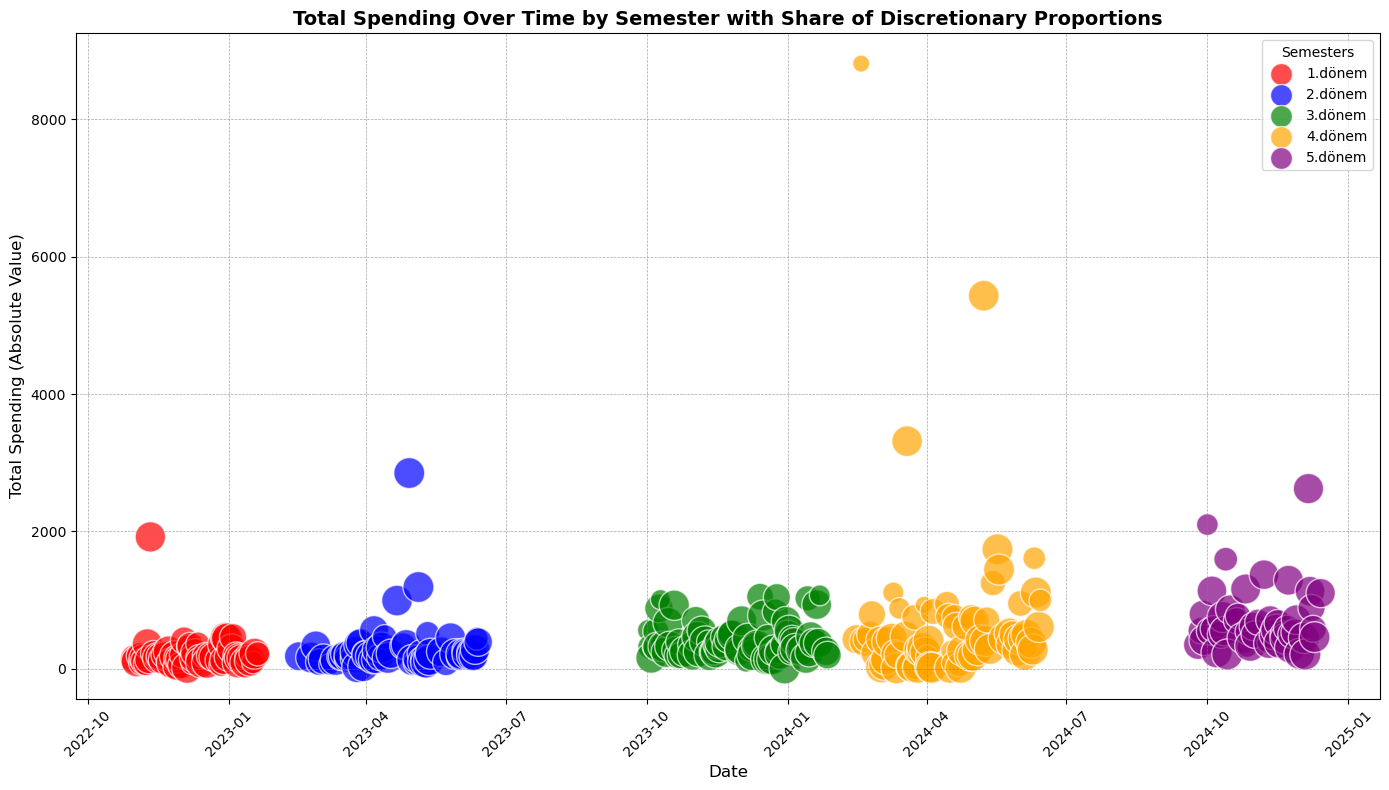

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure the 'Total Spending' and 'Share of Discretionary' are numeric and 'Tarih' is a datetime
df['Total Spending'] = df['Total Spending'].abs()
df['Share of Discretionary'] = pd.to_numeric(df['Share of Discretionary'], errors='coerce')
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Semester definitions
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}
colors = ["red", "blue", "green", "orange", "purple"]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Iterate over semesters and assign colors
for (semester, (start, end)), color in zip(semesters.items(), colors):
    # Filter data for the current semester
    semester_data = df[(df['Tarih'] >= start) & (df['Tarih'] <= end)]
    # Volume proportionality: scale with the cube root
    circle_sizes = np.cbrt(semester_data['Share of Discretionary']) * 500  # Adjust scaling factor
    plt.scatter(
        semester_data['Tarih'],
        semester_data['Total Spending'],
        s=circle_sizes,
        alpha=0.7,
        label=semester,
        color=color,
        edgecolors='w',
    )

# Customizing the plot
plt.title('Total Spending Over Time by Semester with Share of Discretionary Proportions', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Semesters")

# Show the plot
plt.tight_layout()
plt.show()


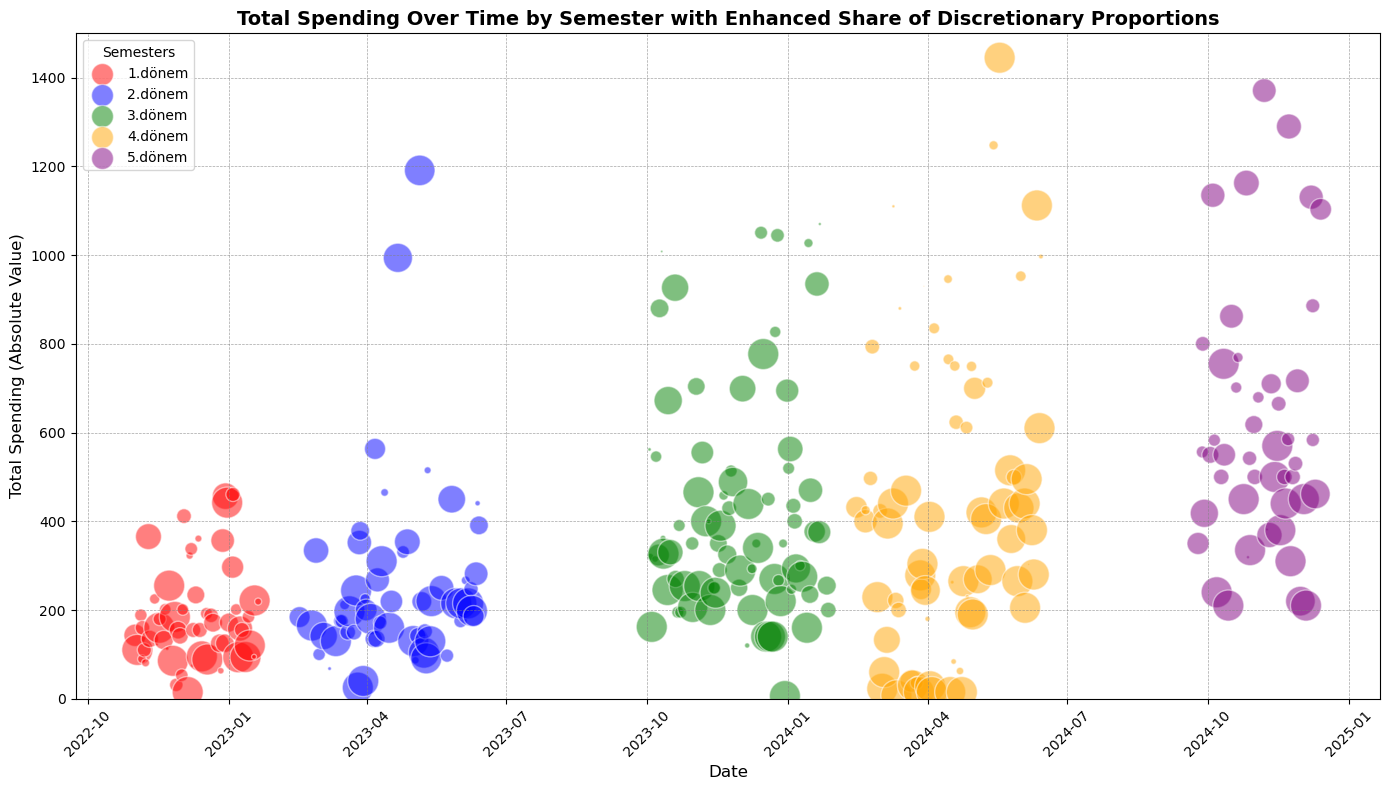

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure the 'Total Spending' and 'Share of Discretionary' are numeric and 'Tarih' is a datetime
df['Total Spending'] = df['Total Spending'].abs()
df['Share of Discretionary'] = pd.to_numeric(df['Share of Discretionary'], errors='coerce')
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Semester definitions
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}
colors = ["red", "blue", "green", "orange", "purple"]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Iterate over semesters and assign colors
for (semester, (start, end)), color in zip(semesters.items(), colors):
    # Filter data for the current semester
    semester_data = df[(df['Tarih'] >= start) & (df['Tarih'] <= end)]
    
    # Volume proportionality: make larger values more sensitive
    circle_sizes = (semester_data['Share of Discretionary'] ** 2) * 500  # Increased sensitivity
    
    # Add jitter to reduce overlapping
    jitter = np.random.uniform(-0.5, 0.5, len(semester_data))
    jittered_dates = semester_data['Tarih'] + pd.to_timedelta(jitter, unit='d')
    
    plt.scatter(
        jittered_dates,
        semester_data['Total Spending'],
        s=circle_sizes,
        alpha=0.5,  # Increase transparency
        label=semester,
        color=color,
        edgecolors='w',
    )

# Limit the y-axis
plt.ylim(0, 1500)

# Customizing the plot
plt.title('Total Spending Over Time by Semester with Enhanced Share of Discretionary Proportions', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Semesters")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
"""
the spring semester has total at the bottom due to spring break that Im home
"""

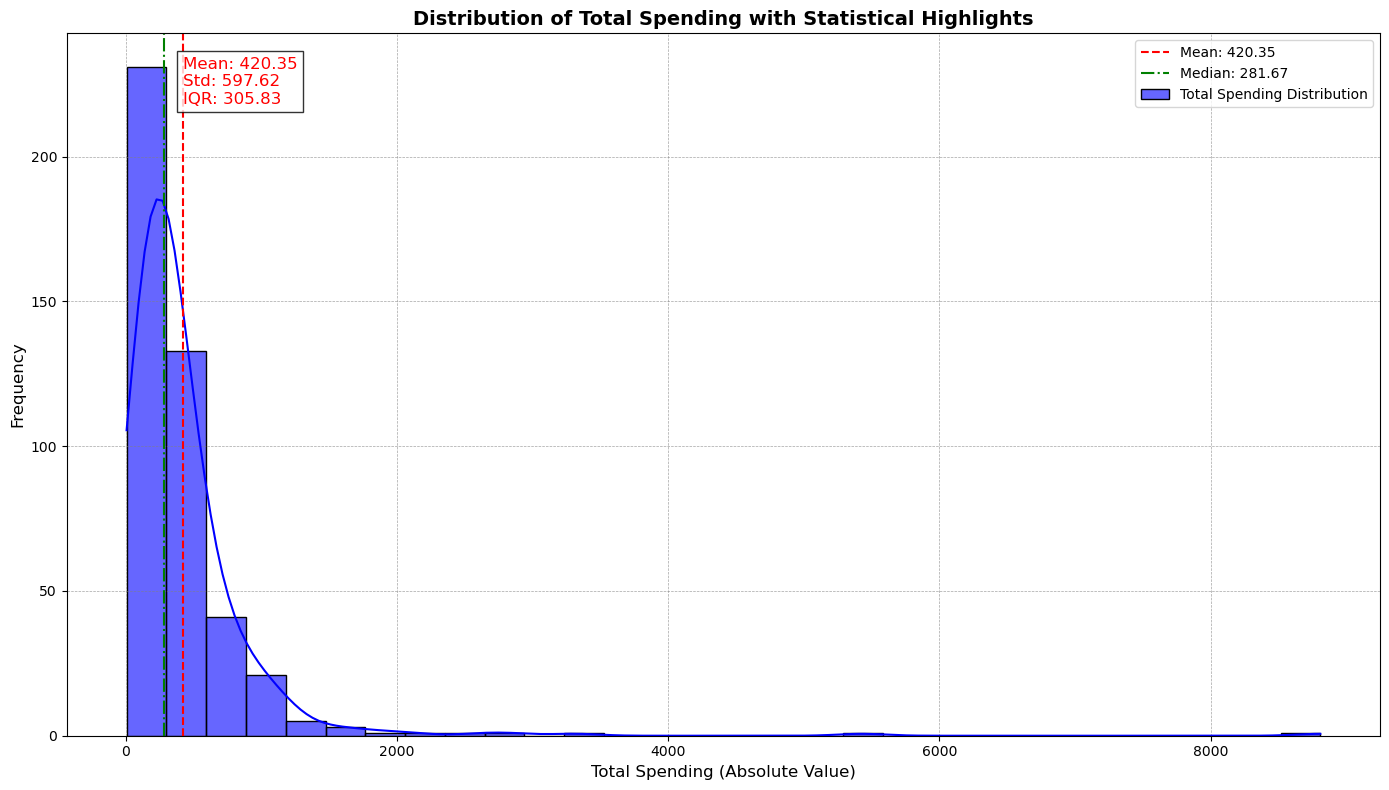

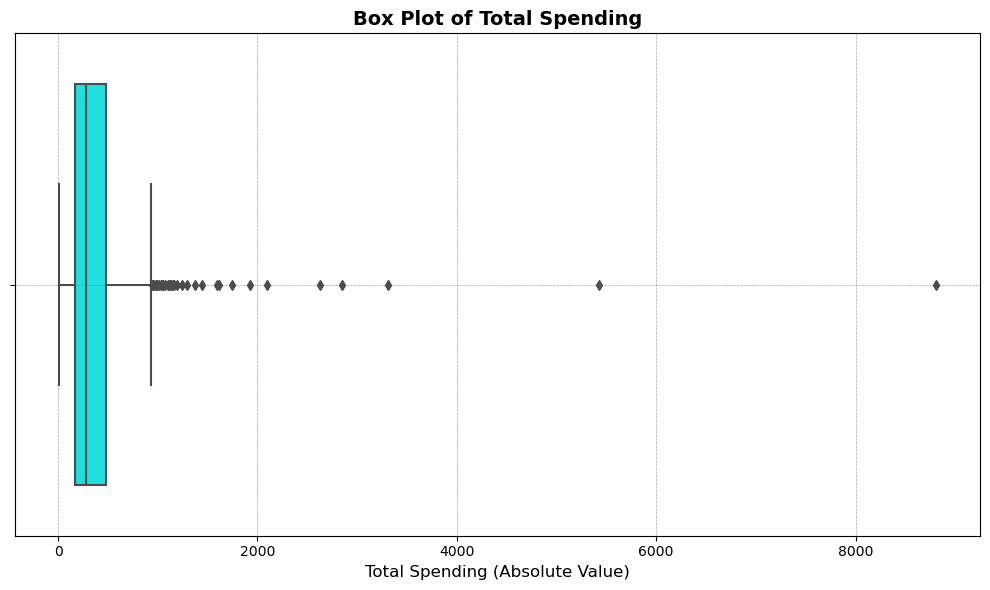

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure 'Total Spending' is numeric
df['Total Spending'] = df['Total Spending'].abs()
df['Share of Discretionary'] = pd.to_numeric(df['Share of Discretionary'], errors='coerce')

# Compute statistics
mean_spending = df['Total Spending'].mean()
median_spending = df['Total Spending'].median()
std_spending = df['Total Spending'].std()
iqr_spending = np.percentile(df['Total Spending'], 75) - np.percentile(df['Total Spending'], 25)

# Plot histogram and KDE
plt.figure(figsize=(14, 8))

sns.histplot(
    df['Total Spending'],
    kde=True,
    color='blue',
    bins=30,
    alpha=0.6,
    label='Total Spending Distribution'
)

# Add mean line
plt.axvline(mean_spending, color='red', linestyle='--', label=f'Mean: {mean_spending:.2f}')
plt.axvline(median_spending, color='green', linestyle='-.', label=f'Median: {median_spending:.2f}')

# Add annotations for mean, std, and IQR
plt.text(
    mean_spending, 
    plt.ylim()[1] * 0.9, 
    f"Mean: {mean_spending:.2f}\nStd: {std_spending:.2f}\nIQR: {iqr_spending:.2f}",
    color='red',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

# Customization
plt.title('Distribution of Total Spending with Statistical Highlights', fontsize=14, fontweight='bold')
plt.xlabel('Total Spending (Absolute Value)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Spending'], color='cyan')
plt.title('Box Plot of Total Spending', fontsize=14, fontweight='bold')
plt.xlabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


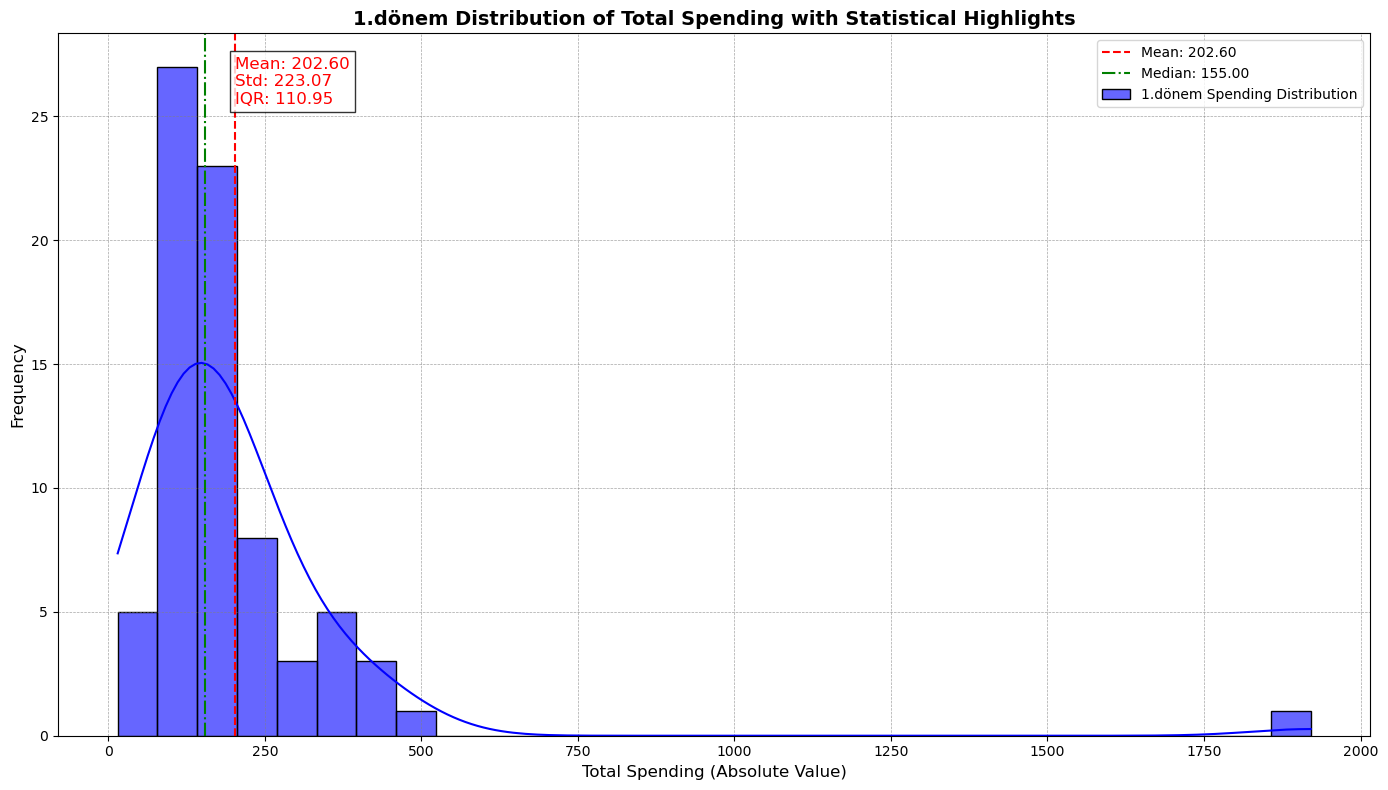

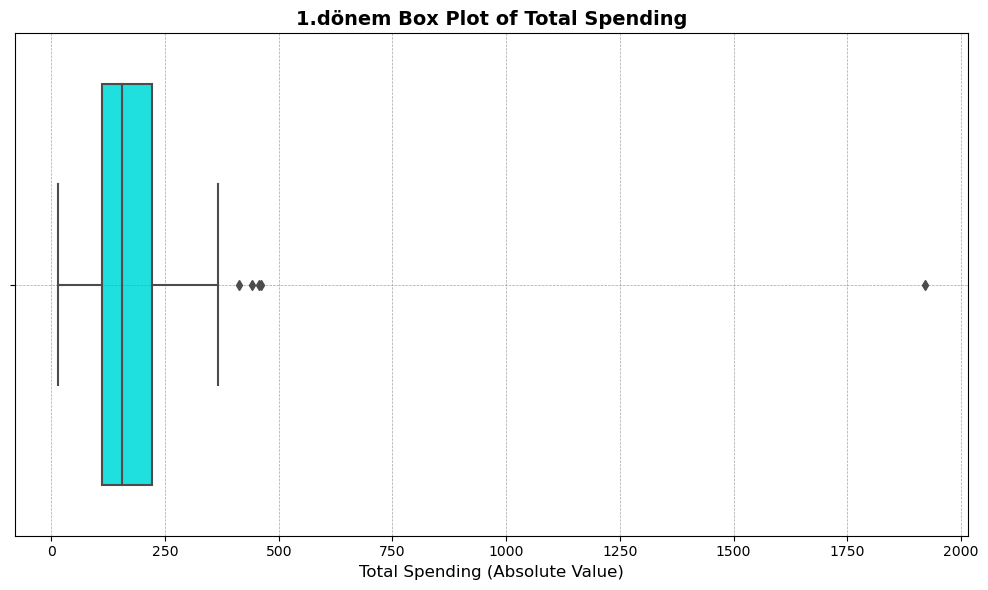

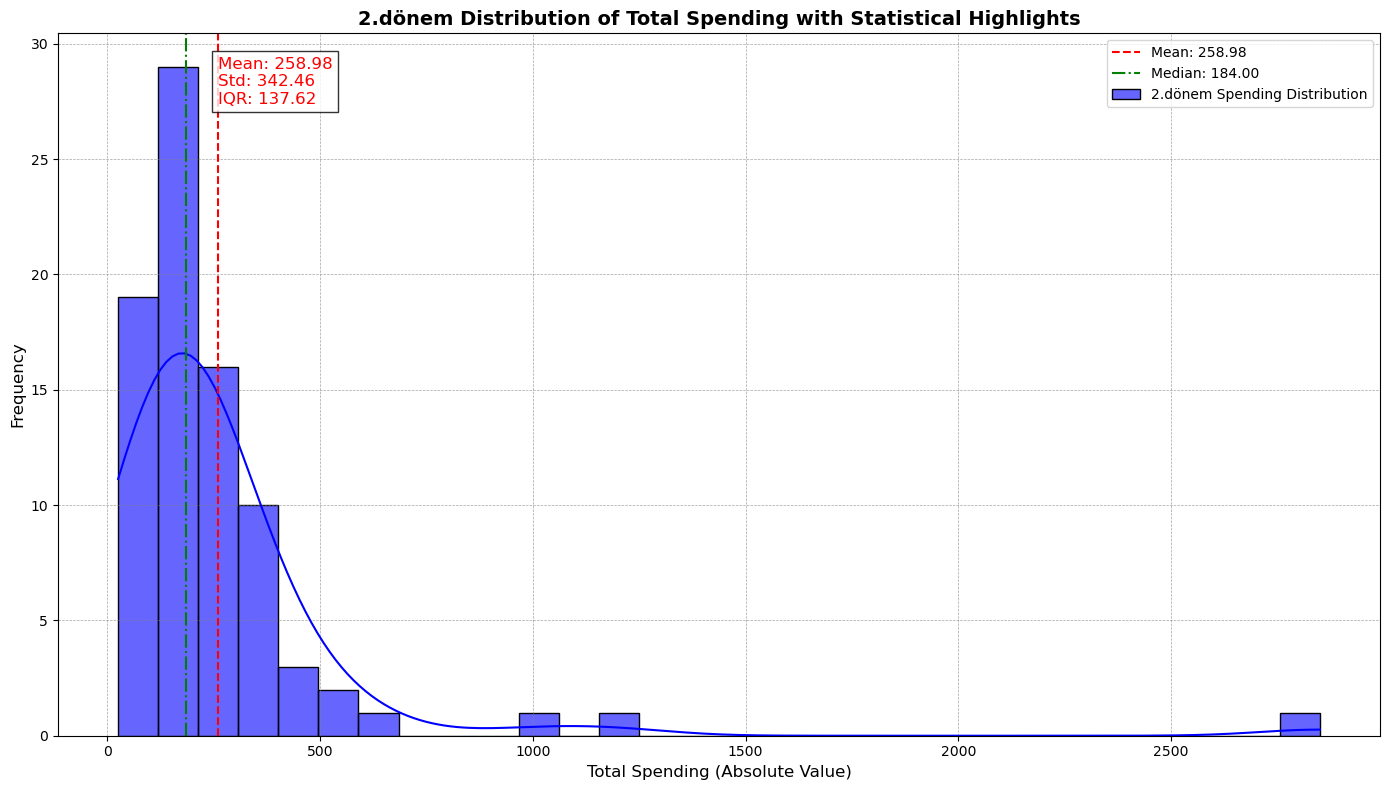

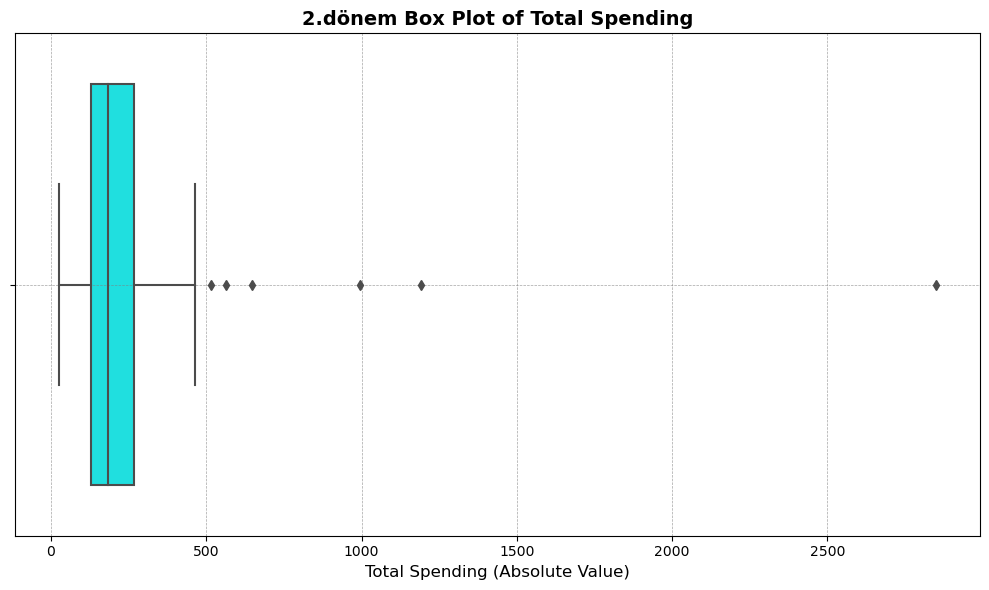

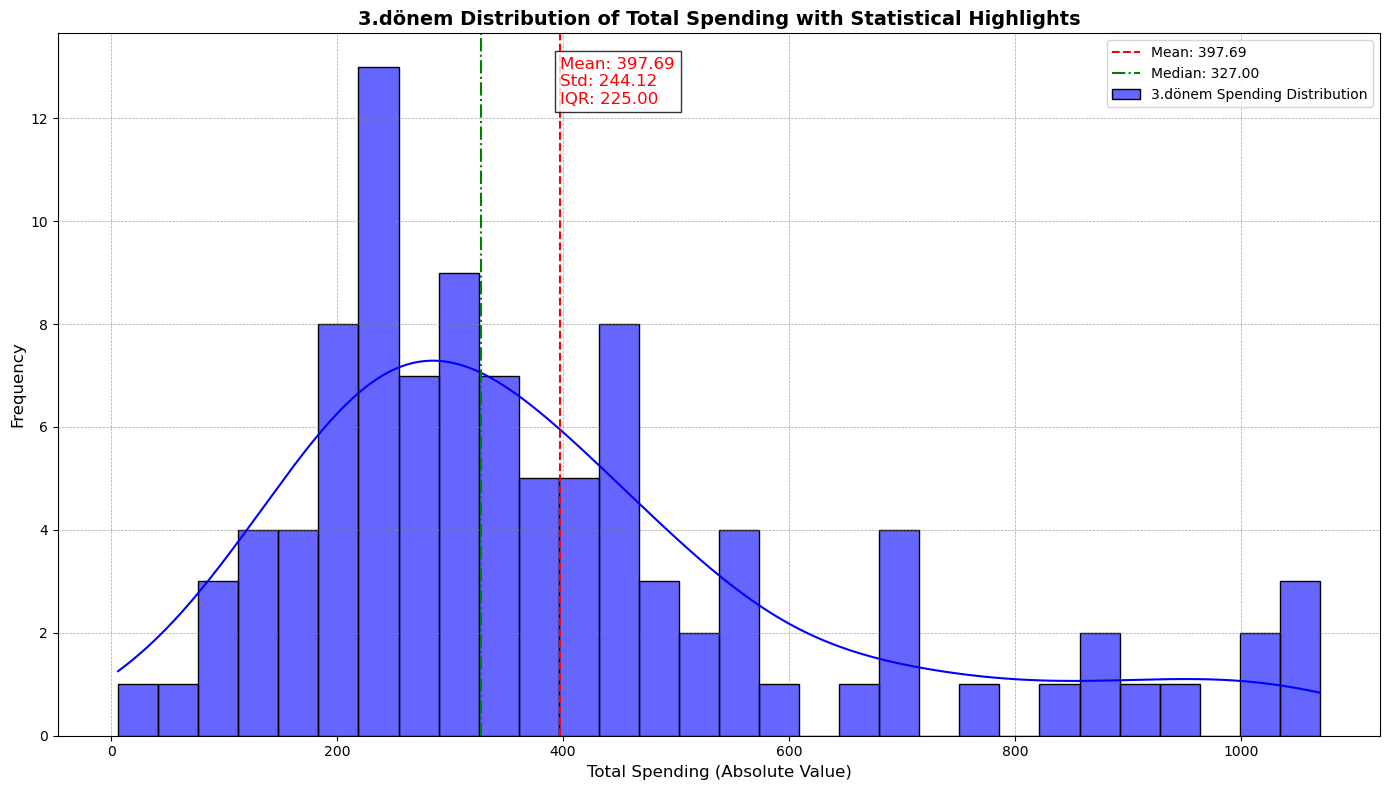

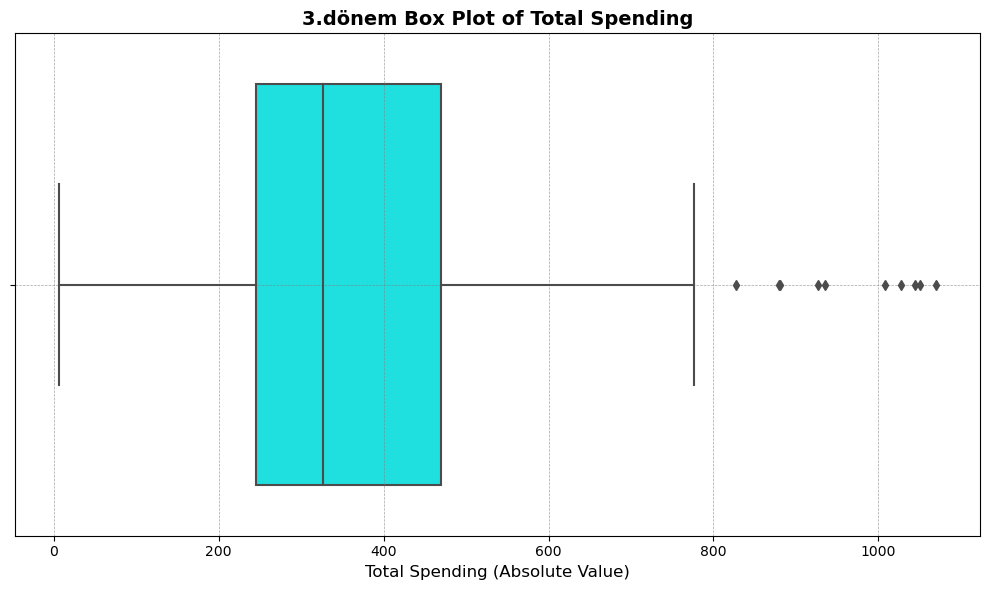

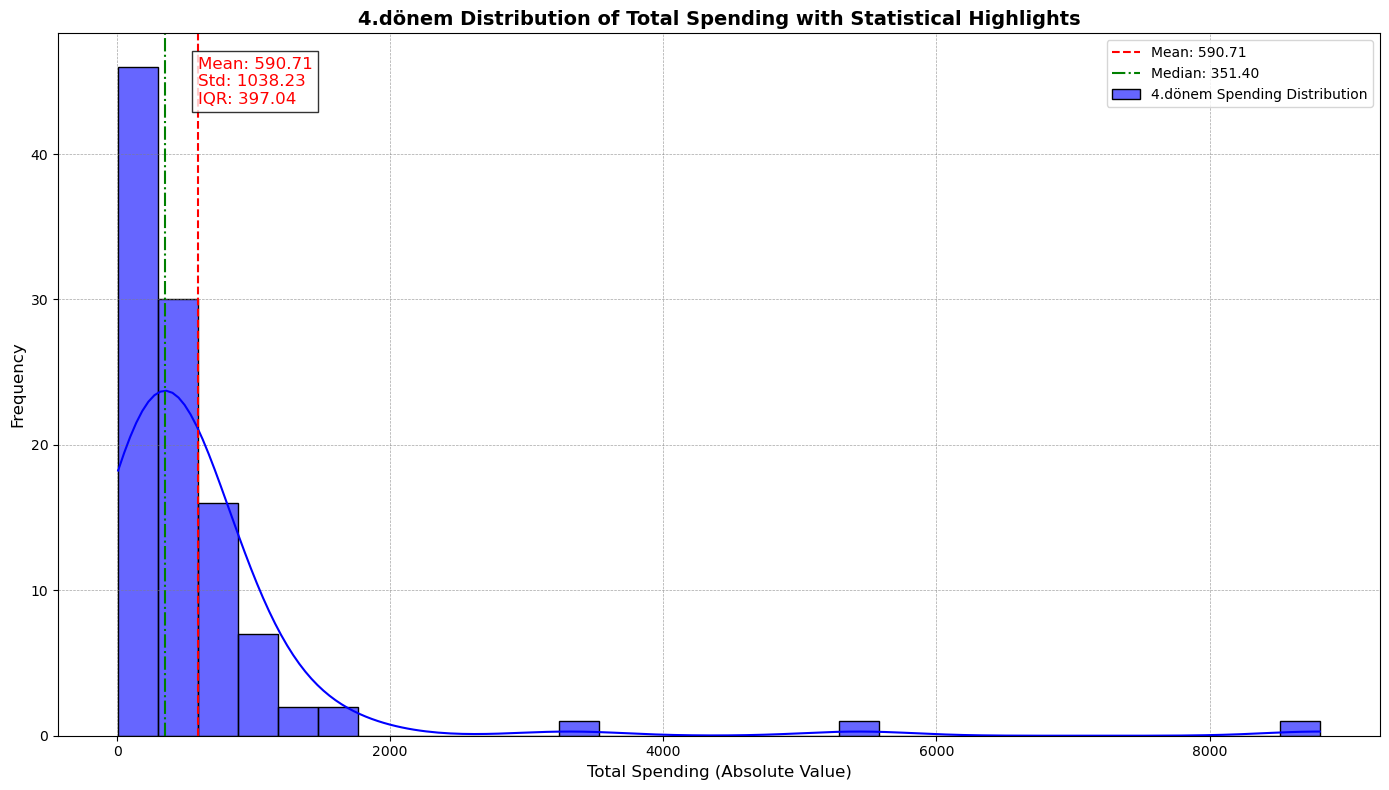

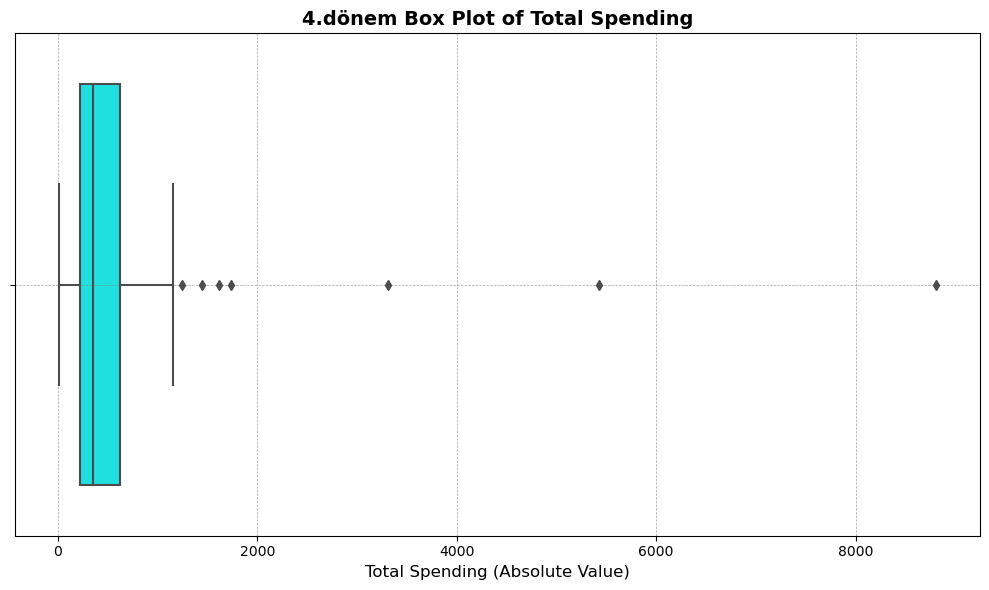

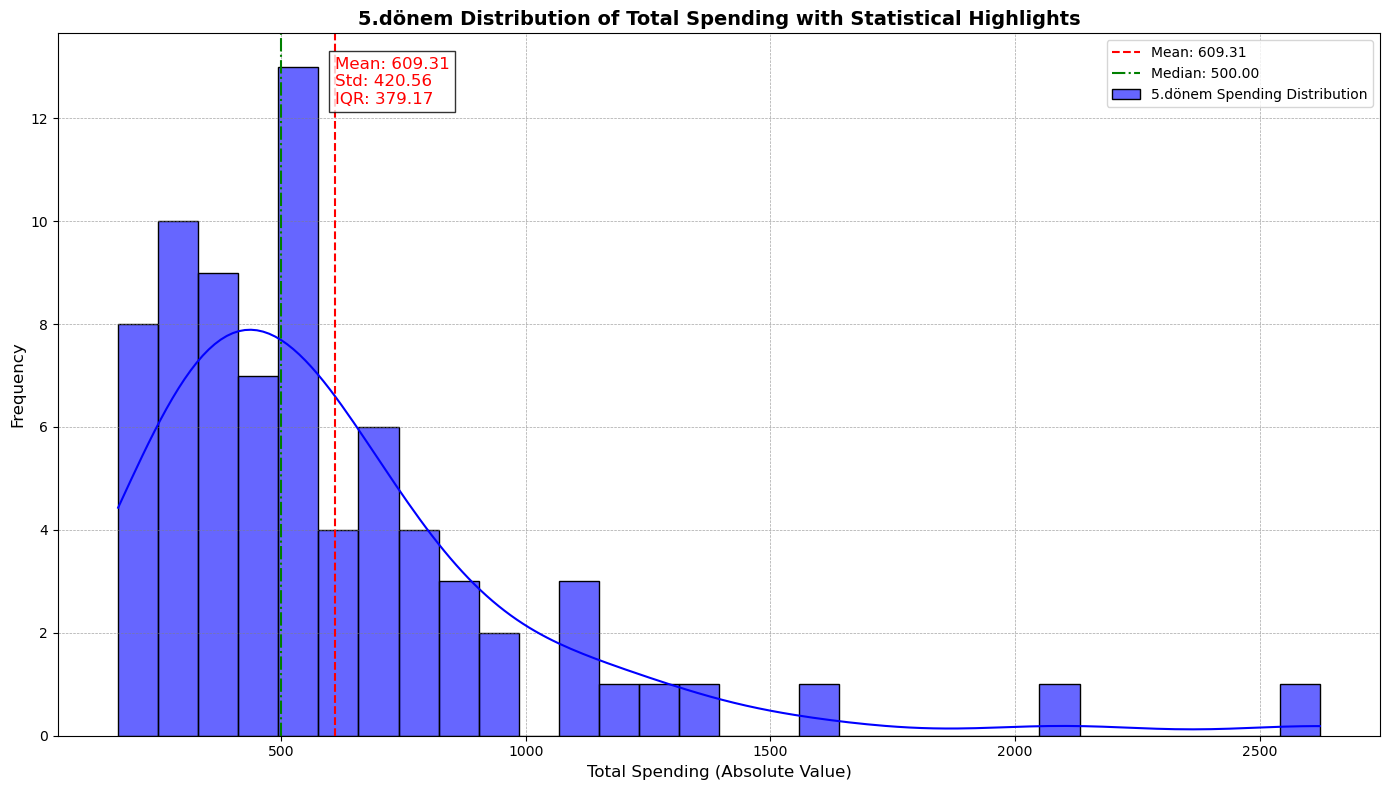

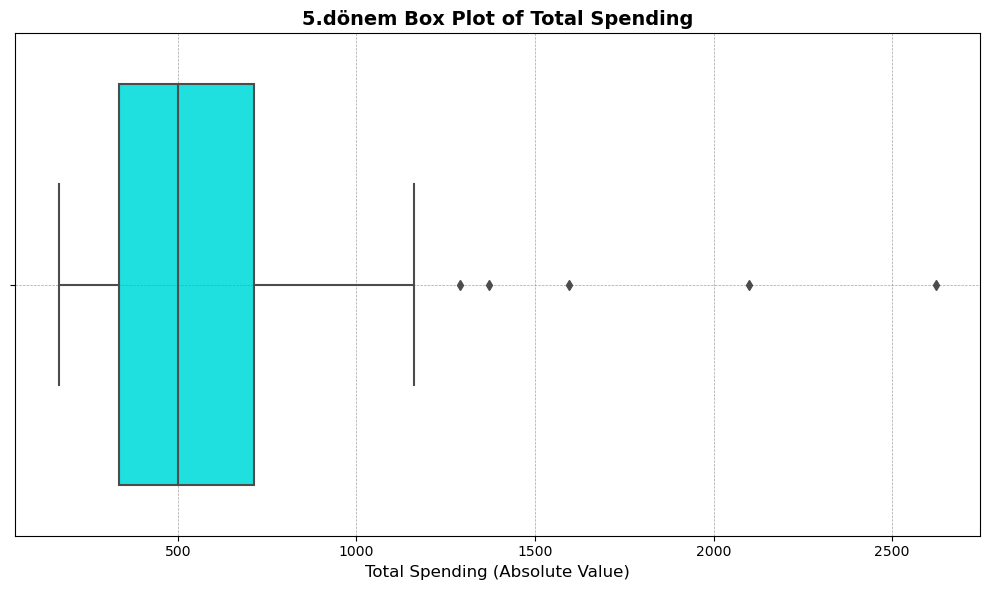

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure 'Total Spending' is numeric and convert 'Tarih' to datetime
df['Total Spending'] = df['Total Spending'].abs()
df['Share of Discretionary'] = pd.to_numeric(df['Share of Discretionary'], errors='coerce')
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Semester definitions
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}

# Iterate over semesters and create plots for each
for semester, (start, end) in semesters.items():
    # Filter data for the current semester
    semester_data = df[(df['Tarih'] >= start) & (df['Tarih'] <= end)]
    
    # Compute statistics
    mean_spending = semester_data['Total Spending'].mean()
    median_spending = semester_data['Total Spending'].median()
    std_spending = semester_data['Total Spending'].std()
    iqr_spending = np.percentile(semester_data['Total Spending'], 75) - np.percentile(semester_data['Total Spending'], 25)

    # Plot histogram and KDE
    plt.figure(figsize=(14, 8))
    sns.histplot(
        semester_data['Total Spending'],
        kde=True,
        color='blue',
        bins=30,
        alpha=0.6,
        label=f'{semester} Spending Distribution'
    )
    # Add mean line
    plt.axvline(mean_spending, color='red', linestyle='--', label=f'Mean: {mean_spending:.2f}')
    plt.axvline(median_spending, color='green', linestyle='-.', label=f'Median: {median_spending:.2f}')
    
    # Add annotations for mean, std, and IQR
    plt.text(
        mean_spending, 
        plt.ylim()[1] * 0.9, 
        f"Mean: {mean_spending:.2f}\nStd: {std_spending:.2f}\nIQR: {iqr_spending:.2f}",
        color='red',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8)
    )

    # Customization
    plt.title(f'{semester} Distribution of Total Spending with Statistical Highlights', fontsize=14, fontweight='bold')
    plt.xlabel('Total Spending (Absolute Value)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Plot box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=semester_data['Total Spending'], color='cyan')
    plt.title(f'{semester} Box Plot of Total Spending', fontsize=14, fontweight='bold')
    plt.xlabel('Total Spending (Absolute Value)', fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


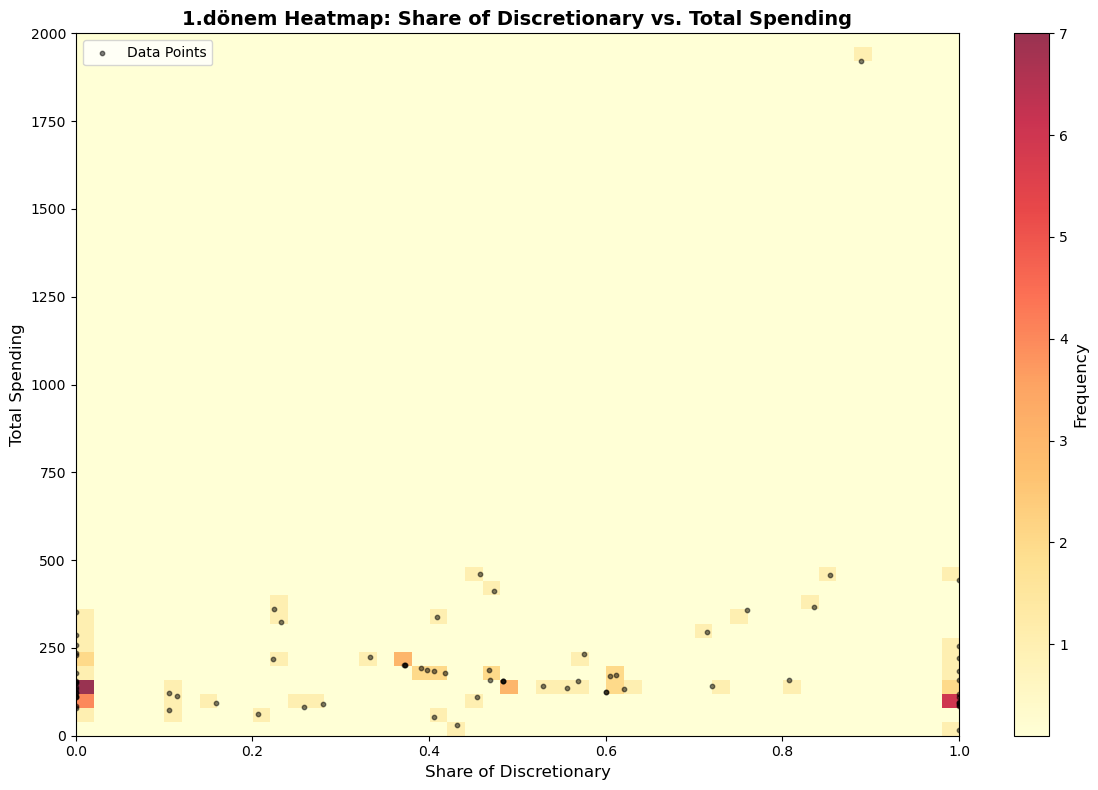

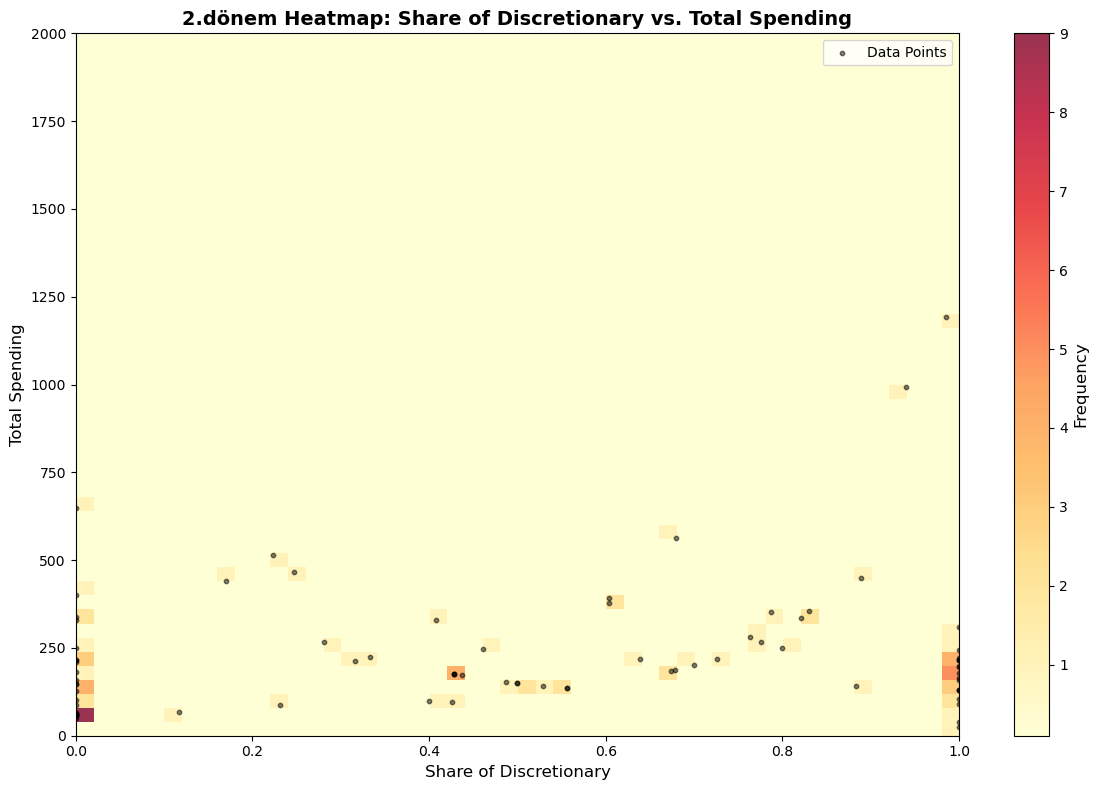

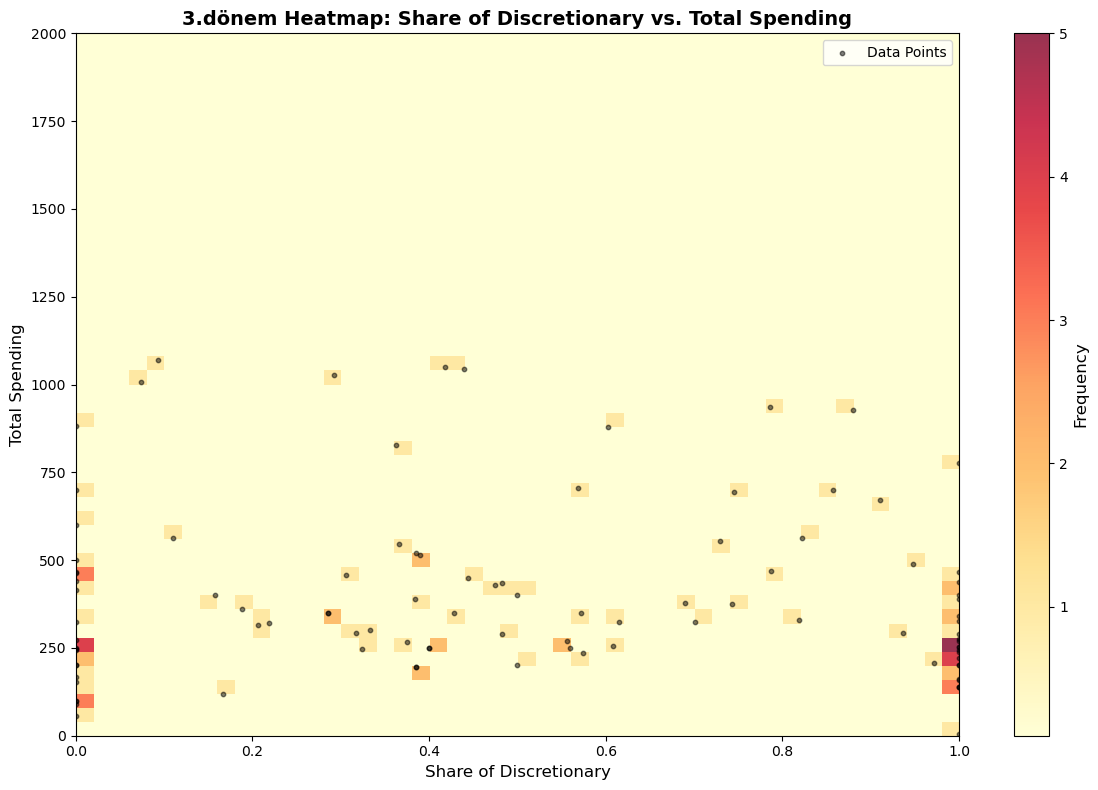

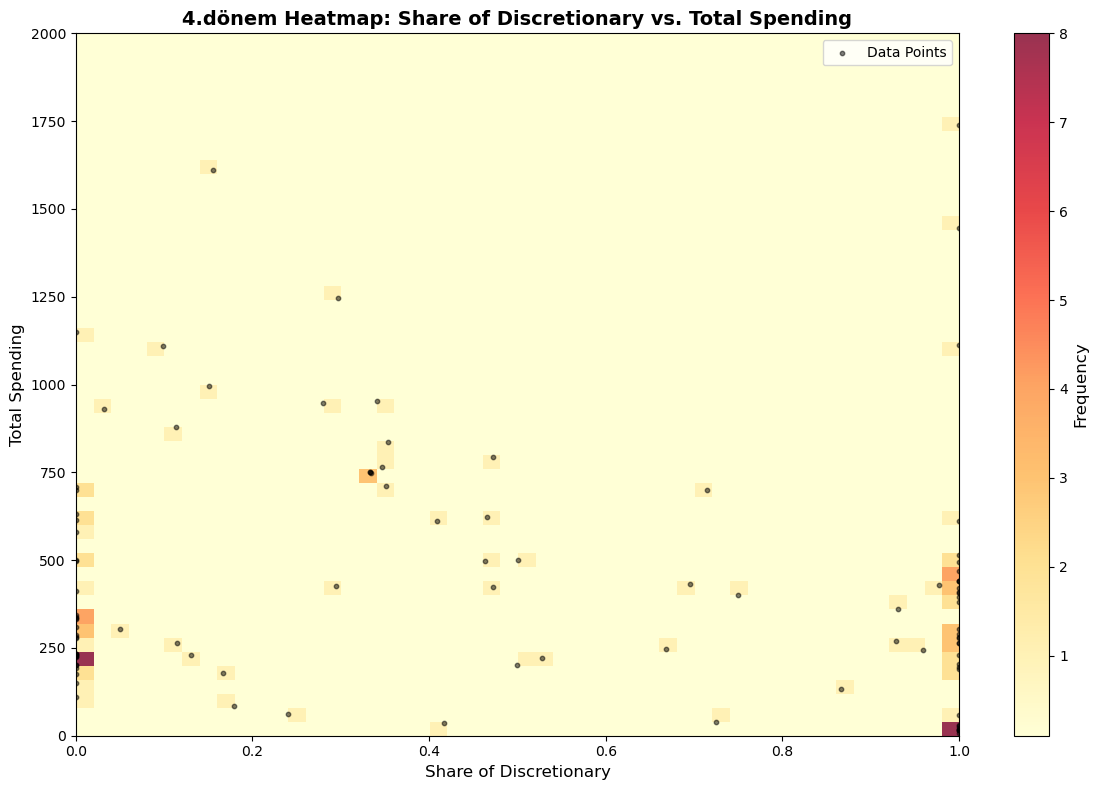

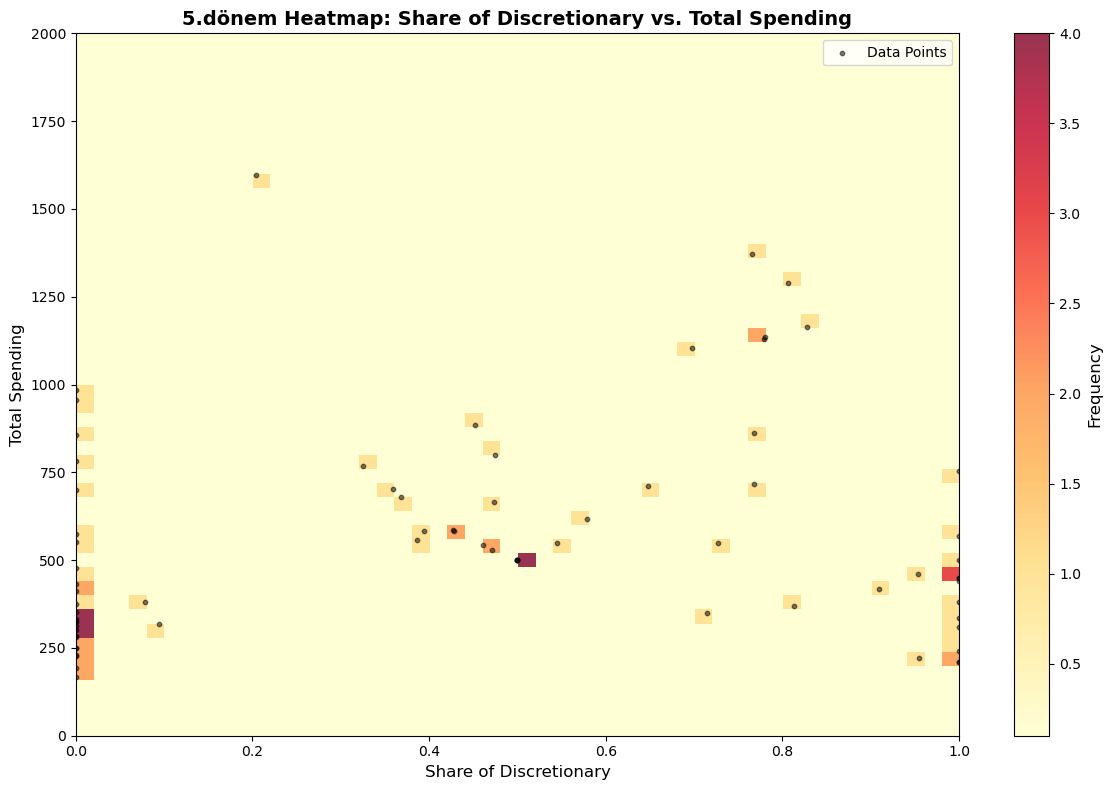

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure the columns are properly formatted
df['Total Spending'] = df['Total Spending'].abs()
df['Share of Discretionary'] = pd.to_numeric(df['Share of Discretionary'], errors='coerce')
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Define the semesters
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}

# Global scales for color normalization
min_spending = 0  # Set minimum spending to 0
max_spending = 2000  # Set maximum spending to 2000
min_discrepancy = df['Share of Discretionary'].min()
max_discrepancy = df['Share of Discretionary'].max()

# Create a colormap for each semester
for semester, (start, end) in semesters.items():
    # Filter data for the current semester
    semester_data = df[(df['Tarih'] >= start) & (df['Tarih'] <= end)]
    semester_data = semester_data[semester_data['Total Spending'] <= max_spending]  # Filter spending above 2000

    # Generate the heatmap points
    x = semester_data['Share of Discretionary']
    y = semester_data['Total Spending']
    heatmap, xedges, yedges = np.histogram2d(
        x, y, bins=50, range=[[min_discrepancy, max_discrepancy], [min_spending, max_spending]]
    )

    # Normalize the heatmap for consistent color scale
    heatmap = heatmap.T

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_facecolor('#FFFFFF')  # Set the axes background to white
    fig.patch.set_facecolor('#FFFFFF')  # Set the figure background to white

    im = ax.imshow(
        heatmap,
        aspect='auto',
        interpolation='nearest',
        cmap='YlOrRd',  # Use the yellow-to-red colormap
        extent=[min_discrepancy, max_discrepancy, min_spending, max_spending],
        origin='lower',
        alpha=0.8,  # Adjust transparency to make background lighter
        vmin=0.1,  # Adjust minimum value for light base color
        vmax=np.max(heatmap)  # Maximum value for normalization
    )

    # Overlay data points for clear distinction
    ax.scatter(
        x,
        y,
        c='black',  # Data points color
        alpha=0.5,  # Transparency for points
        s=10,  # Marker size
        label='Data Points'
    )
    
    # Add color bar
    cbar = plt.colorbar(im)
    cbar.set_label('Frequency', fontsize=12)

    # Customization
    ax.set_title(f"{semester} Heatmap: Share of Discretionary vs. Total Spending", fontsize=14, fontweight='bold')
    ax.set_xlabel("Share of Discretionary", fontsize=12)
    ax.set_ylabel("Total Spending", fontsize=12)
    ax.grid(False)  # Disable grid to keep the white background
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()


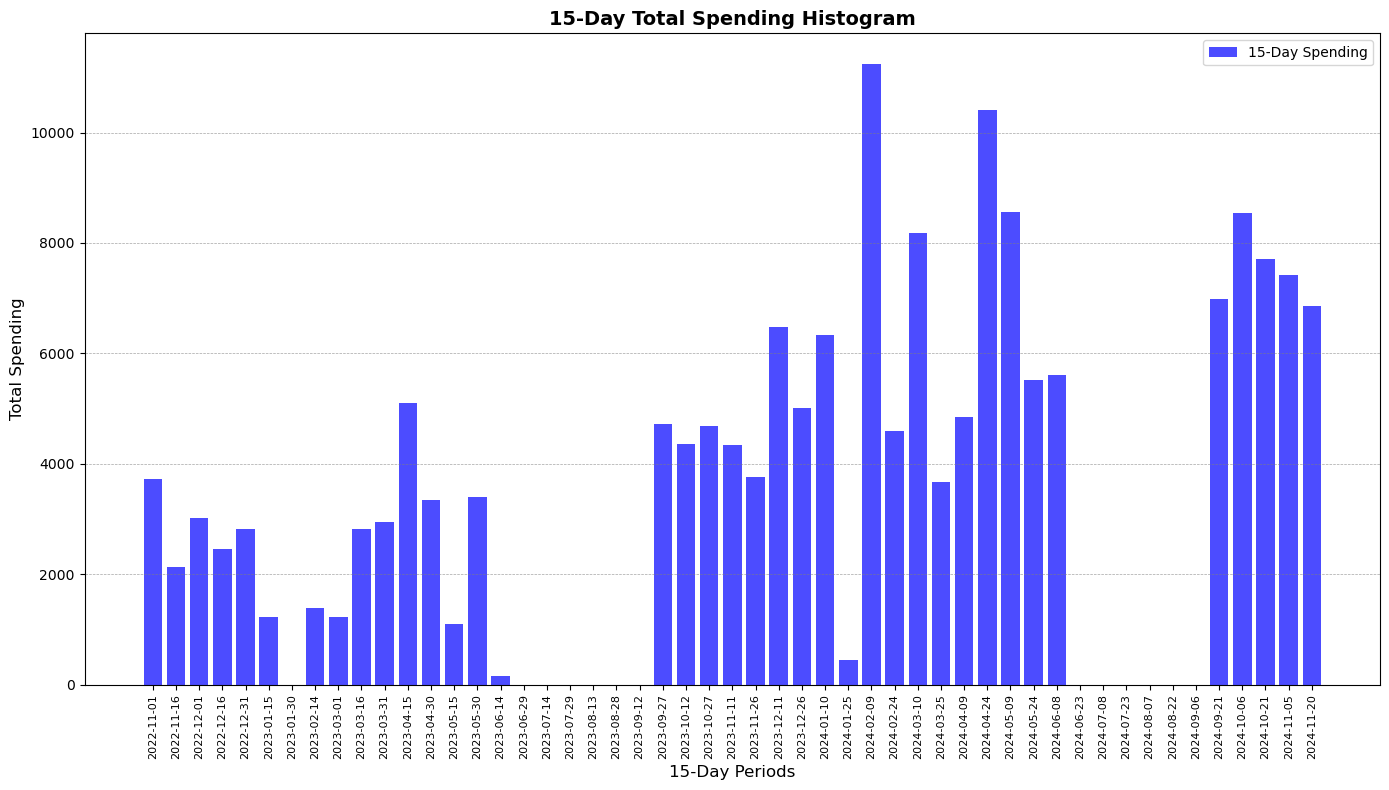

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\Lenovo\Desktop\DSA210_raw_Data\final_categorized_merged.csv'
df = pd.read_csv(file_path)

# Ensure 'Total Spending' is numeric and 'Tarih' is datetime
df['Total Spending'] = pd.to_numeric(df['Total Spending'].abs(), errors='coerce')
df['Tarih'] = pd.to_datetime(df['Tarih'], errors='coerce')

# Define the full timeline range
start_date = pd.Timestamp("2022-11-01")
end_date = pd.Timestamp("2024-12-14")

# Create a 15-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='15D')

# Group data into 15-day bins and sum 'Total Spending'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
spending_summary = df.groupby('Time Bin')['Total Spending'].sum().reindex(bins[:-1], fill_value=0)

# Prepare bin labels for visualization
bin_labels = bins[:-1].strftime('%Y-%m-%d')

# Plot the histogram
plt.figure(figsize=(14, 8))
plt.bar(bin_labels, spending_summary, color='blue', alpha=0.7, label='15-Day Spending')
plt.xticks(rotation=90, fontsize=8)
plt.title('15-Day Total Spending Histogram', fontsize=14, fontweight='bold')
plt.xlabel('15-Day Periods', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


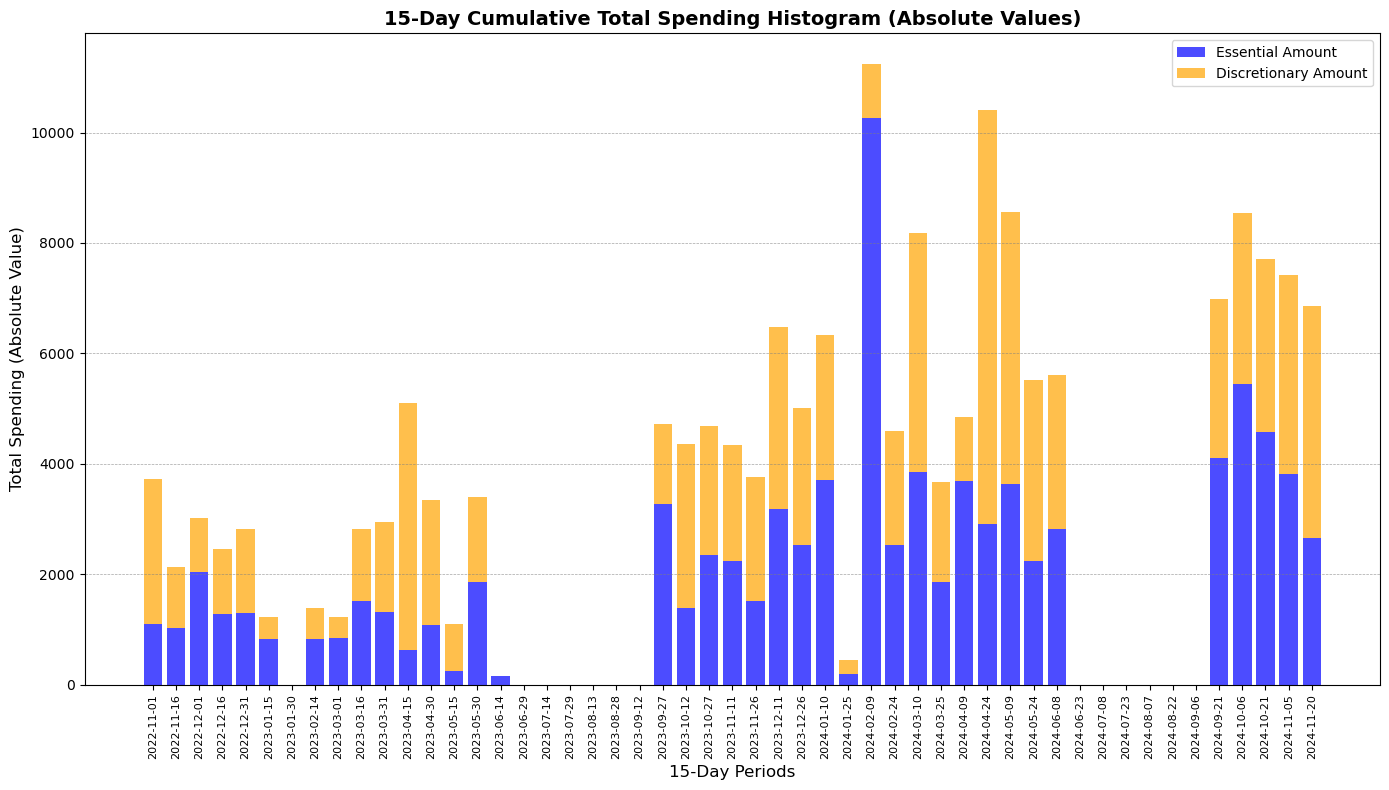

In [30]:
# Ensure the absolute values of 'Essential Amount' and 'Discretionary Amount' are used
df['Essential Amount'] = df['Essential Amount'].abs()
df['Discretionary Amount'] = df['Discretionary Amount'].abs()

# Create a 15-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='15D')

# Group data into 15-day bins and sum 'Essential Amount' and 'Discretionary Amount'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
essential_summary = df.groupby('Time Bin')['Essential Amount'].sum().reindex(bins[:-1], fill_value=0)
discretionary_summary = df.groupby('Time Bin')['Discretionary Amount'].sum().reindex(bins[:-1], fill_value=0)

# Prepare bin labels for visualization
bin_labels = bins[:-1].strftime('%Y-%m-%d')

# Plot the cumulative histogram
plt.figure(figsize=(14, 8))
plt.bar(bin_labels, essential_summary, color='blue', alpha=0.7, label='Essential Amount')
plt.bar(bin_labels, discretionary_summary, bottom=essential_summary, color='orange', alpha=0.7, label='Discretionary Amount')
plt.xticks(rotation=90, fontsize=8)
plt.title('15-Day Cumulative Total Spending Histogram (Absolute Values)', fontsize=14, fontweight='bold')
plt.xlabel('15-Day Periods', fontsize=12)
plt.ylabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


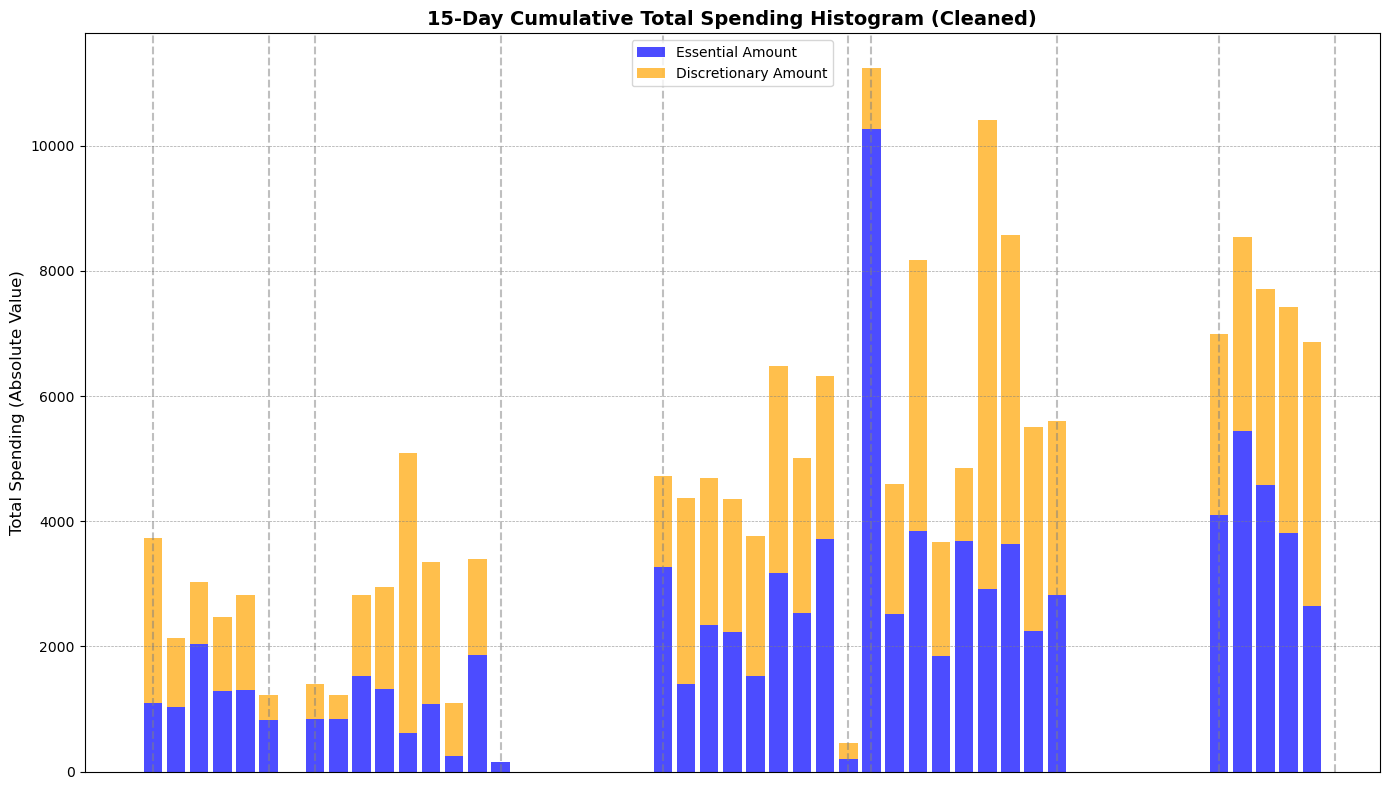

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the absolute values of 'Essential Amount' and 'Discretionary Amount' are used
df['Essential Amount'] = df['Essential Amount'].abs()
df['Discretionary Amount'] = df['Discretionary Amount'].abs()

# Define the timeline range
start_date = pd.Timestamp("2022-11-01")
end_date = pd.Timestamp("2024-12-14")

# Create a 15-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='15D')

# Group data into 15-day bins and sum 'Essential Amount' and 'Discretionary Amount'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
essential_summary = df.groupby('Time Bin')['Essential Amount'].sum().reindex(bins[:-1], fill_value=0)
discretionary_summary = df.groupby('Time Bin')['Discretionary Amount'].sum().reindex(bins[:-1], fill_value=0)

# Define the semester start and end dates
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}

# Prepare simplified bin labels
bin_labels = bins[:-1].strftime('%Y-%m-%d')

# Plot the cumulative histogram
plt.figure(figsize=(14, 8))
plt.bar(range(len(bin_labels)), essential_summary, color='blue', alpha=0.7, label='Essential Amount')
plt.bar(range(len(bin_labels)), discretionary_summary, bottom=essential_summary, color='orange', alpha=0.7, label='Discretionary Amount')

# Add transparent vertical lines for semesters
for semester, (start, end) in semesters.items():
    start_idx = (pd.to_datetime(start) - start_date).days // 15
    end_idx = (pd.to_datetime(end) - start_date).days // 15
    plt.axvline(x=start_idx, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=end_idx, color='gray', linestyle='--', alpha=0.5)

# Remove all x-axis labels and ticks
plt.xticks([], [])

# Title and labels
plt.title('15-Day Cumulative Total Spending Histogram (Cleaned)', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


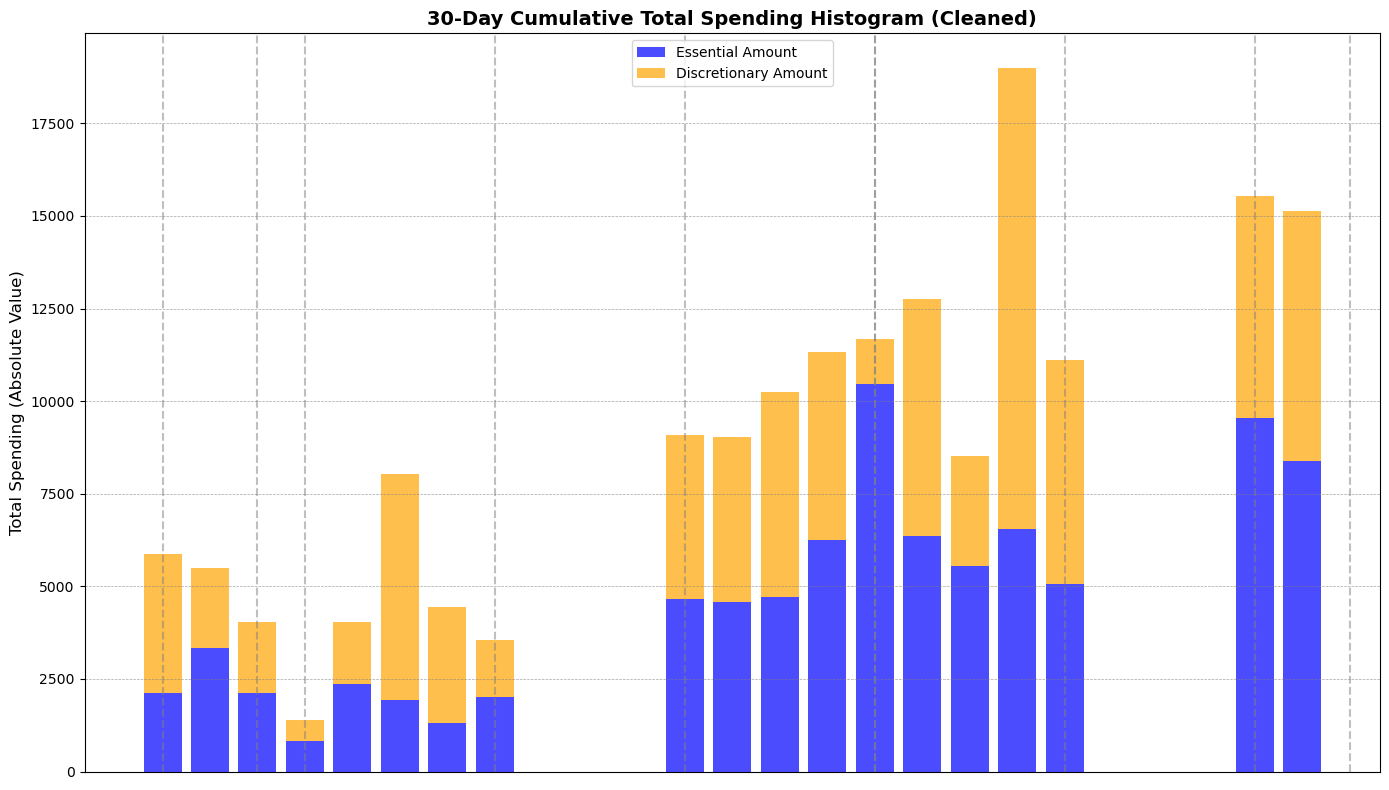

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the absolute values of 'Essential Amount' and 'Discretionary Amount' are used
df['Essential Amount'] = df['Essential Amount'].abs()
df['Discretionary Amount'] = df['Discretionary Amount'].abs()

# Define the timeline range
start_date = pd.Timestamp("2022-11-01")
end_date = pd.Timestamp("2024-12-14")

# Create a 30-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='30D')

# Group data into 30-day bins and sum 'Essential Amount' and 'Discretionary Amount'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
essential_summary = df.groupby('Time Bin')['Essential Amount'].sum().reindex(bins[:-1], fill_value=0)
discretionary_summary = df.groupby('Time Bin')['Discretionary Amount'].sum().reindex(bins[:-1], fill_value=0)

# Define the semester start and end dates
semesters = {
    "1.dönem": ("2022-11-01", "2023-01-21"),
    "2.dönem": ("2023-02-16", "2023-06-14"),
    "3.dönem": ("2023-10-01", "2024-01-27"),
    "4.dönem": ("2024-02-15", "2024-06-14"),
    "5.dönem": ("2024-09-25", "2024-12-14"),
}

# Prepare simplified bin labels
bin_labels = bins[:-1].strftime('%Y-%m-%d')

# Plot the cumulative histogram
plt.figure(figsize=(14, 8))
plt.bar(range(len(bin_labels)), essential_summary, color='blue', alpha=0.7, label='Essential Amount')
plt.bar(range(len(bin_labels)), discretionary_summary, bottom=essential_summary, color='orange', alpha=0.7, label='Discretionary Amount')

# Add transparent vertical lines for semesters
for semester, (start, end) in semesters.items():
    start_idx = (pd.to_datetime(start) - start_date).days // 30
    end_idx = (pd.to_datetime(end) - start_date).days // 30
    plt.axvline(x=start_idx, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(x=end_idx, color='gray', linestyle='--', alpha=0.5)

# Remove all x-axis labels and ticks
plt.xticks([], [])

# Title and labels
plt.title('30-Day Cumulative Total Spending Histogram (Cleaned)', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Total Spending (Absolute Value)', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()


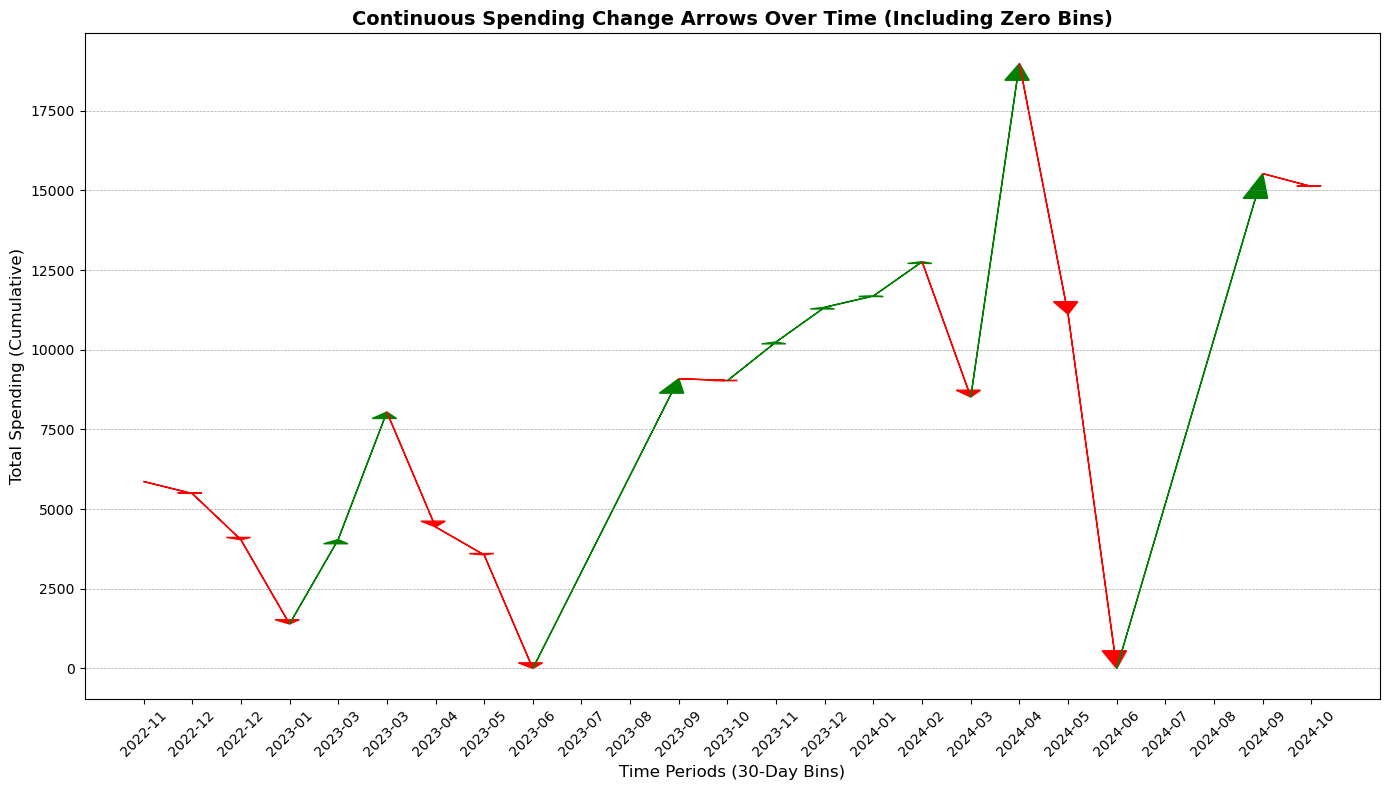

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure absolute values for 'Essential Amount' and 'Discretionary Amount'
df['Essential Amount'] = df['Essential Amount'].abs()
df['Discretionary Amount'] = df['Discretionary Amount'].abs()

# Define the timeline range
start_date = pd.Timestamp("2022-11-01")
end_date = pd.Timestamp("2024-12-14")

# Create 30-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='30D')

# Group data into 30-day bins and sum 'Essential Amount' and 'Discretionary Amount'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
total_spending_summary = (
    df.groupby('Time Bin')[['Essential Amount', 'Discretionary Amount']]
    .sum()
    .reindex(bins[:-1], fill_value=0)
    .sum(axis=1)  # Sum both columns for total spending
)

# Prepare data for arrows, including zero bins
arrow_x = []
arrow_y = []
spending_changes = []

current_value = total_spending_summary.iloc[0]
arrow_y.append(current_value)
arrow_x.append(0)  # Start at x=0

for i, value in enumerate(total_spending_summary):
    if value != current_value:  # A change (non-zero bin or next valid value)
        spending_changes.append(value - current_value)
        current_value = value
        arrow_y.append(value)
        arrow_x.append(i)

# Plot arrows for spending changes
plt.figure(figsize=(14, 8))
for i in range(1, len(arrow_x)):
    dx = arrow_x[i] - arrow_x[i - 1]
    dy = spending_changes[i - 1]
    color = 'green' if dy > 0 else 'red'
    plt.arrow(
        x=arrow_x[i - 1],
        y=arrow_y[i - 1],
        dx=dx,  # Extend x by the number of skipped bins
        dy=dy,  # Change in spending
        color=color,
        head_width=0.5,
        head_length=0.05 * abs(dy),
        length_includes_head=True,
    )

# Set plot title and labels
plt.title('Continuous Spending Change Arrows Over Time (Including Zero Bins)', fontsize=14, fontweight='bold')
plt.xlabel('Time Periods (30-Day Bins)', fontsize=12)
plt.ylabel('Total Spending (Cumulative)', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(range(len(total_spending_summary)), bins[:-1].strftime('%Y-%m'), rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


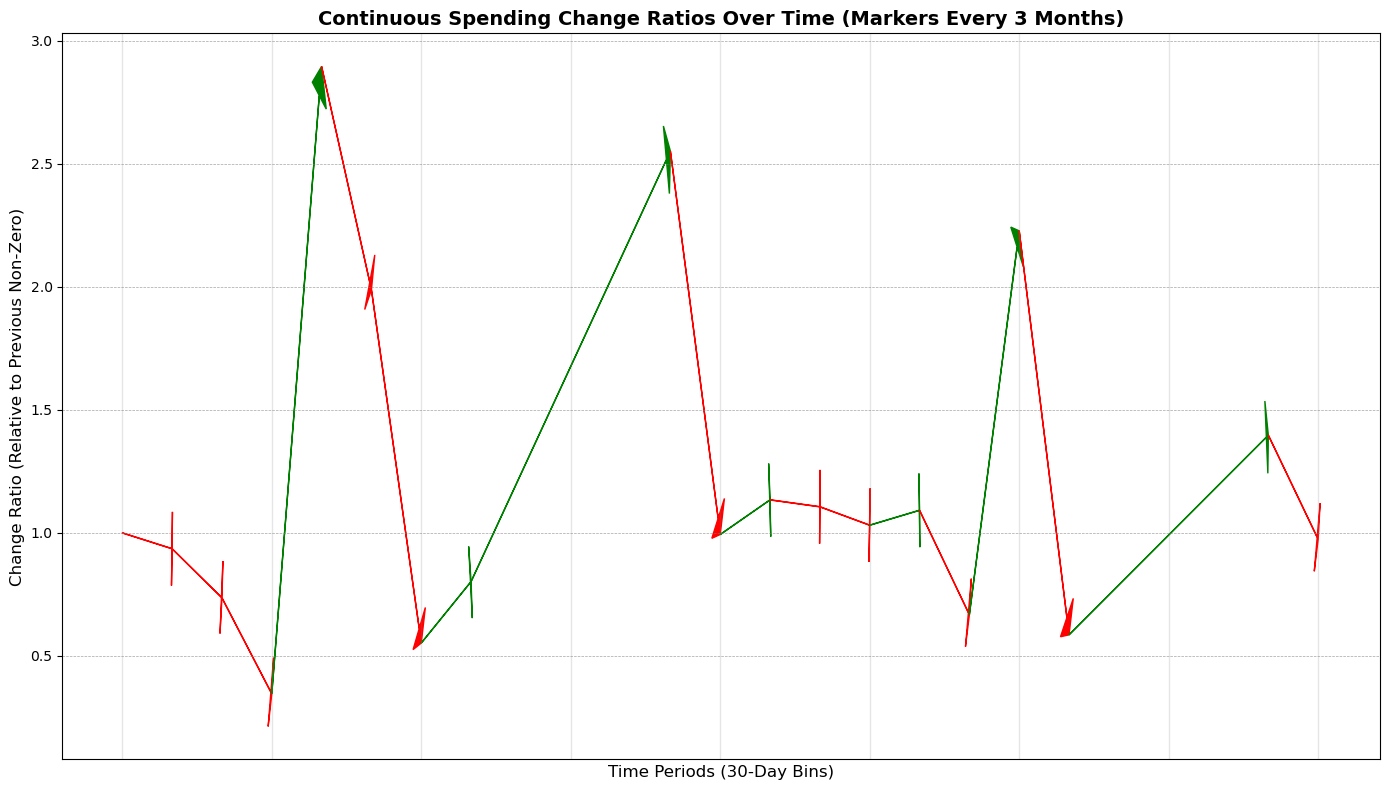

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure absolute values for 'Essential Amount' and 'Discretionary Amount'
df['Essential Amount'] = df['Essential Amount'].abs()
df['Discretionary Amount'] = df['Discretionary Amount'].abs()

# Define the timeline range
start_date = pd.Timestamp("2022-11-01")
end_date = pd.Timestamp("2024-12-14")

# Create 30-day bins timeline
bins = pd.date_range(start=start_date, end=end_date, freq='30D')

# Group data into 30-day bins and sum 'Essential Amount' and 'Discretionary Amount'
df['Time Bin'] = pd.cut(df['Tarih'], bins=bins, right=False)
total_spending_summary = (
    df.groupby('Time Bin')[['Essential Amount', 'Discretionary Amount']]
    .sum()
    .reindex(bins[:-1], fill_value=0)
    .sum(axis=1)  # Sum both columns for total spending
)

# Prepare data for change ratios, skipping zero bins
arrow_x = []
arrow_y = []
change_ratios = []

current_value = total_spending_summary.iloc[0]
arrow_y.append(1)  # Initial ratio (100% or 1 for baseline)
arrow_x.append(0)  # Start at x=0

for i, value in enumerate(total_spending_summary):
    if value > 0:  # Only calculate ratios for non-zero bins
        change_ratio = value / current_value if current_value > 0 else 1
        change_ratios.append(change_ratio)
        current_value = value
        arrow_y.append(change_ratio)
        arrow_x.append(i)

# Plot arrows for change ratios
plt.figure(figsize=(14, 8))
for i in range(1, len(arrow_x)):
    dx = arrow_x[i] - arrow_x[i - 1]
    dy = arrow_y[i] - arrow_y[i - 1]
    color = 'green' if dy > 0 else 'red'
    plt.arrow(
        x=arrow_x[i - 1],
        y=arrow_y[i - 1],
        dx=dx,  # Extend x by the number of skipped bins
        dy=dy,  # Change in ratio
        color=color,
        head_width=0.3,
        head_length=0.05 * abs(dy),
        length_includes_head=True,
    )

# Add transparent thicker markers every 3 months
for i in range(0, len(bins[:-1]), 3):  # Every 3 bins (approximately 3 months)
    plt.axvline(x=i, color='gray', linestyle='-', linewidth=1, alpha=0.2)

# Set plot title and labels
plt.title('Continuous Spending Change Ratios Over Time (Markers Every 3 Months)', fontsize=14, fontweight='bold')
plt.xlabel('Time Periods (30-Day Bins)', fontsize=12)
plt.ylabel('Change Ratio (Relative to Previous Non-Zero)', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove x-axis labels
plt.xticks([], [])

plt.tight_layout()
plt.show()
